# Explatory Data Analysis (EDA) of transcription data
---

In [1]:
# Import all used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

## 1. Data Overview and Summary

In [4]:
# Load the dataset
X_path = "../data/raw/X.tsv"
Y_path = "../data/raw/Y.tsv"
X = pd.read_csv(X_path, sep="\t")
Y = pd.read_csv(Y_path, sep="\t")

# Drop the first naming column of X
X = X.drop(columns=X.columns[0])

# Set all columns to zero if a nan value is present
X = X.fillna(0)

# Extend X with the perturbation column of Y
X["pert_dose"] = Y["pert_dose"]

# Only select the viability column of Y as target
Y = Y["viability"]

# Display basic info
print(X.info()) 
print(X.describe())  
print(X.shape)

print(Y.info())
print(Y.describe())
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31567 entries, 0 to 31566
Columns: 683 entries, ABL1 to pert_dose
dtypes: float64(683)
memory usage: 164.5 MB
None
               ABL1         AEBP1           AHR           AIP          AIRE  \
count  31567.000000  31567.000000  31567.000000  31567.000000  31567.000000   
mean       0.060299     -0.030205     -0.020144     -0.176588      0.000546   
std        1.084374      0.894065      1.042536      1.105731      0.943762   
min       -4.990434     -4.908446     -4.777732     -8.380349     -3.697534   
25%       -0.652610     -0.610971     -0.729544     -0.833906     -0.634276   
50%        0.042457     -0.036753     -0.039709     -0.138573     -0.004679   
75%        0.751101      0.538581      0.678185      0.534285      0.628666   
max        6.036182      5.283196      4.415507      6.226515      4.035215   

                AP1         APEX1            AR        ARID1A        ARID1B  \
count  31567.000000  31567.000000  31567.000

## 2. Missing Data Analysis

In [5]:
# Check for missing values
X_null = X.isnull().sum()
Y_null = Y.isnull().sum()

print("Missing values in X:")
print(X_null[X_null > 0])

print("\nMissing values in Y:")
print(Y_null[Y_null > 0])

Missing values in X:
pert_dose    1
dtype: int64

Missing values in Y:
[408]


## 3. Distribution Analysis

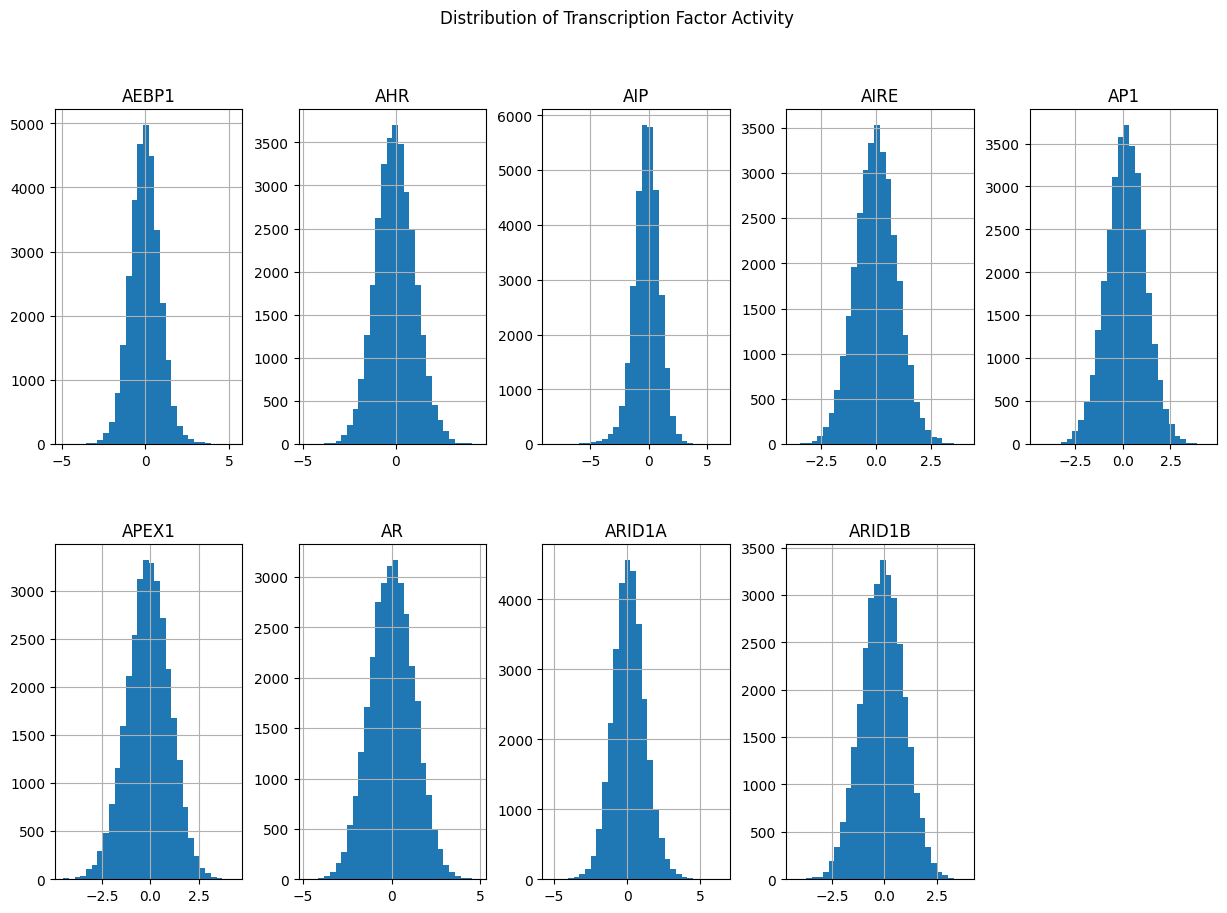

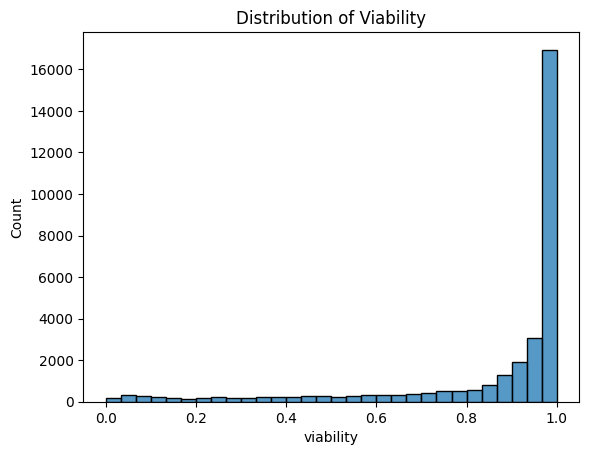

In [6]:
# Select a few columns for plotting
sample_columns = X.columns[1:10]
X[sample_columns].hist(bins=30, figsize=(15, 10), layout=(2, 5))
plt.suptitle("Distribution of Transcription Factor Activity")
plt.show()

# Plot the distribution of the target variable (viability and pert_dose)
sns.histplot(Y, bins=30)
plt.title("Distribution of Viability")
plt.show()

## 4. Correlation Analysis

### 4.1 Filter by High Correlation

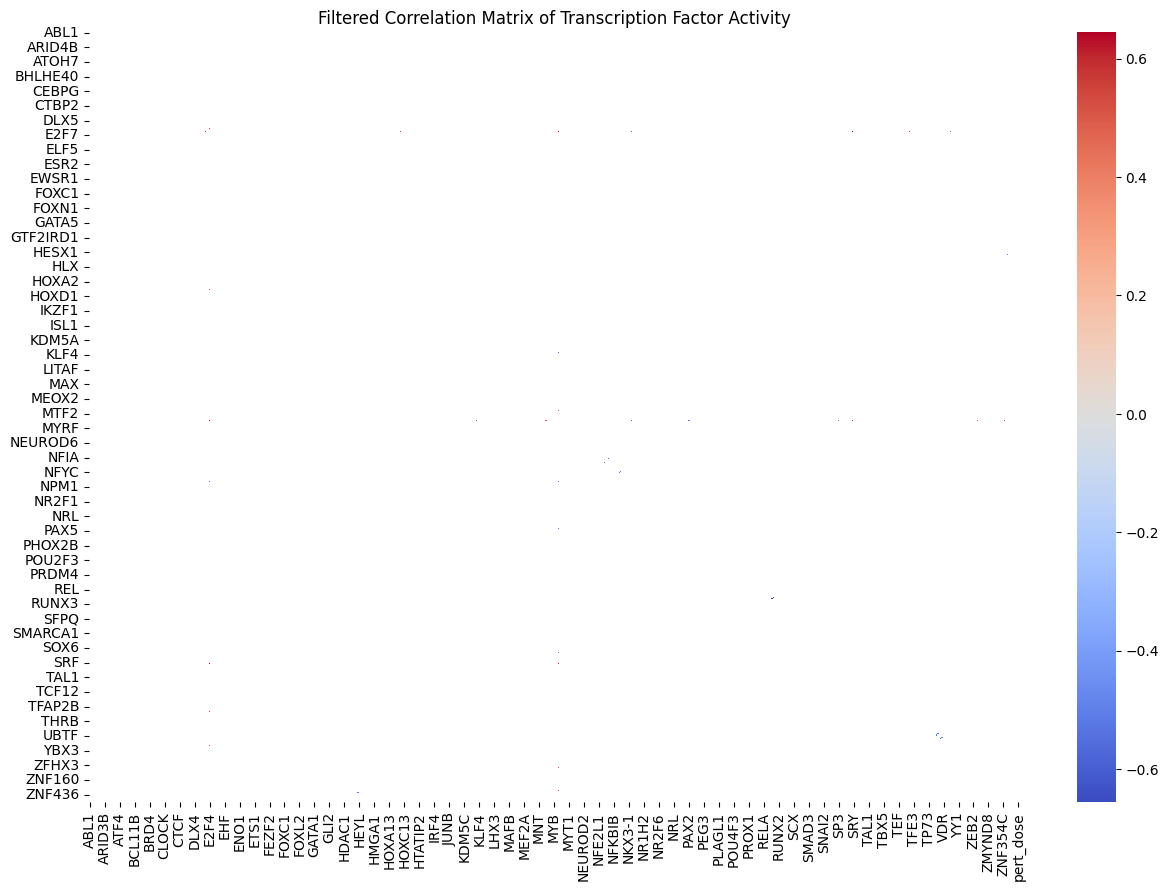

In [7]:
# Compute correlation matrix for X
correlation_matrix = X.corr()

# Define the threshold for correlation
threshold = 0.5

# Filter the correlation matrix
filtered_corr_matrix = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Plot the filtered correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix, annot=False, cmap="coolwarm")
plt.title("Filtered Correlation Matrix of Transcription Factor Activity")
plt.show()


In [ ]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Compute the linkage matrix
linkage = sch.linkage(correlation_matrix, method="ward")

# Plot the clustered heatmap
plt.figure(figsize=(12, 8))
sns.clustermap(
    correlation_matrix,
    cmap="coolwarm",
    center=0,
    row_linkage=linkage,
    col_linkage=linkage,
)
plt.title("Clustered Correlation Heatmap")
plt.show()

## 5. Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.iloc[:, 1:].fillna(0))

# Visualize PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()